In [111]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [112]:
df = pd.read_csv('adult_csv.csv')

In [113]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capitalgain       48842 non-null int64
capitalloss       48842 non-null int64
hoursperweek      48842 non-null int64
native-country    47985 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [123]:
# take a look at the outcome/independent variable 'income'
df['class'].value_counts()

Series([], Name: class, dtype: int64)

In [124]:
df['class'] = [0 if x == "<=50k" else 1 for x in df['class']]

In [125]:
X = df.drop('class',axis=1)
y= df['class']

In [126]:
y

0        1
1        1
2        1
3        1
4        1
        ..
48837    1
48838    1
48839    1
48840    1
48841    1
Name: class, Length: 48842, dtype: int64

## Basic Data cleaning

#### 1. Convert categorical features into numerical

In [47]:
# Decide which categorical variables you want to use in the model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature 'workclass' has '9' unique categories
Feature 'education' has '16' unique categories
Feature 'marital-status' has '7' unique categories
Feature 'occupation' has '15' unique categories
Feature 'relationship' has '6' unique categories
Feature 'race' has '5' unique categories
Feature 'sex' has '2' unique categories
Feature 'native-country' has '42' unique categories


In [48]:
# Although native country has a lot ot of unique categories most categories have few observations
print(X['native-country'].value_counts().sort_values(ascending=False).head())

United-States    43832
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Name: native-country, dtype: int64


In [100]:
# In this case, bucket low frequency categories as 'other'
X['native-country'] = ['United-States' if x=='United-States' else 'Other' for x in X['native-country']]
X['native-country'].value_counts()

United-States    43832
Other             5010
Name: native-country, dtype: int64

In [101]:
dummy_list = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [102]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df,dummy_list):
    for x in dummy_list:
        dummies = pd.get_dummies(df[x],prefix=x,dummy_na=True)
        df=df.drop(x, 1)
        df = pd.concat([df, dummies],axis=1)
    return df

In [103]:
X=dummy_df(X, dummy_list)

In [104]:
X.head()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,race_Black,race_Other,race_White,race_nan,sex_Female,sex_Male,sex_nan,native-country_Other,native-country_United-States,native-country_nan
0,2,77516,13,1,0,2,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,3,83311,13,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,215646,9,0,0,2,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3,3,234721,7,0,0,2,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
4,1,338409,13,0,0,2,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


## Handling missing data

In [105]:
# How much of your data is missing?
X.isnull().sum().sort_values(ascending=False).head()

native-country_nan      0
education_1st-4th       0
education_7th-8th       0
education_9th           0
education_Assoc-acdm    0
dtype: int64

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 74 columns):
age                                     48842 non-null int64
fnlwgt                                  48842 non-null int64
education-num                           48842 non-null int64
capitalgain                             48842 non-null int64
capitalloss                             48842 non-null int64
hoursperweek                            48842 non-null int64
workclass_Federal-gov                   48842 non-null uint8
workclass_Local-gov                     48842 non-null uint8
workclass_Never-worked                  48842 non-null uint8
workclass_Private                       48842 non-null uint8
workclass_Self-emp-inc                  48842 non-null uint8
workclass_Self-emp-not-inc              48842 non-null uint8
workclass_State-gov                     48842 non-null uint8
workclass_Without-pay                   48842 non-null uint8
workclass_nan                        

### Outlier detection

#### Turkey IQR: Ooutliers are defined as :-
##### Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)

In [56]:
# Function to find outliers of a given feature
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3= np.percentile(x, 75)
    iqr = q3-q1
    floor = q1-1.5*iqr
    ceiling = q3+1.5*iqr
    outlier_indices = list(x.index[(x < floor)]|(x > ceiling))
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices,outlier_values

In [57]:
tukey_indices, tukey_values = find_outliers_tukey(X['fnlwgt'])
print(np.sort(tukey_values))

[ 417941  418020  418176 ... 1455435 1484705 1490400]


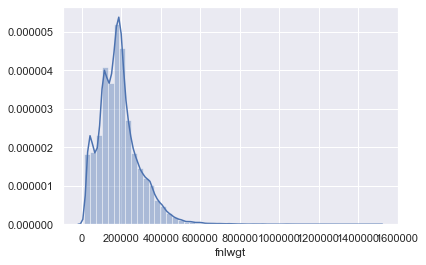

In [58]:
sns.distplot(X['fnlwgt'])

### Outlier detection -Kernel Density Estimation

#### Non-parametric way to estimate the probabiltity density function of a given feature

### Can be advantagious compared to extreme value detection(e.g. Tukey IQR)
#### . Captures outliers in bimodal distributions

In [59]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float,x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott',fft=True)
    pred = kde.evaluate(x_scaled)
    
    n=sum(pred<0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

### Distribution of features

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='gray',alpha=0.5)
    plt.title('Histogram 0f {var_name}'.format(var_name=x.name))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

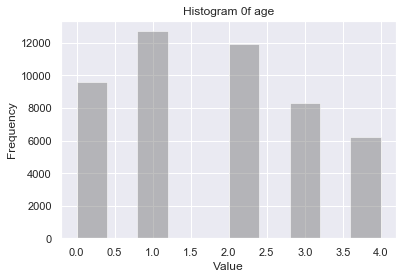

In [61]:
plot_histogram(X['age'])

In [62]:
# Plot histogram to show distribution of features by  class categories
def plot_histogram_class(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='class=0')
    plt.hist(list(x[y==1]), alpha=0.5, label='class=1')
    plt.title("Histogram of '{var_name}' by class category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.show()

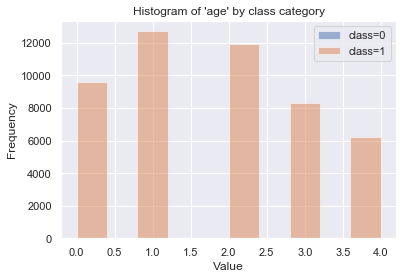

In [65]:
plot_histogram_class(X['age'],y)

In [67]:
y.value_counts()

1    48842
Name: class, dtype: int64